In [2]:
pip install pandas

   ---------------------------------------- 8.7/8.7 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 14.0/14.0 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 508.0/508.0 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import re
import pandas as pd

In [4]:
f = open('WhatsApp Chat with Amity B.Tech CSE 22 A 5th Sem.txt','r',encoding='utf-8')

In [5]:
data = f.read()

In [6]:
print(data)

9/14/22, 20:48 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
9/13/22, 15:56 - Divyansh created group "Btech CSE Sec A 2022-26"
9/14/22, 20:48 - Unnati Singh added you
9/15/22, 10:12 - Unnati Singh added ~ Shubhangii Saraf
9/15/22, 10:15 - Unnati Singh added ~ Pranay Singh😎
9/15/22, 11:04 - Divyansh added Dev Btech Cse
9/15/22, 11:57 - +91 76680 68441: Students come to auditorium ASAP
9/15/22, 15:41 - Divyansh added ~ Ishv Bhardwaj
9/16/22, 15:07 - Divyansh: All those who are interested in badminton come to the main ground for trial!
9/16/22, 15:07 - Divyansh: Kindly come ASAP!
9/16/22, 15:59 - Manikant Thakur: Final call for carrom selection for girls and boys both
9/16/22, 16:56 - +91 63065 20476: <Media omitted>
9/16/22, 18:19 - ~ Vaibhav Shukla added ~ bajsang4@gmail.com
9/16/22, 20:05 - Unnati Singh added Akanksha Singh
9/19/22, 12:25 - Divyansh: <Media omitted>
9/19/22, 12:25 - Divyansh

In [7]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [8]:
messages = re.split(pattern, data)[1:]
len(messages)

1695

In [9]:
dates = re.findall(pattern, data)
dates

['9/14/22, 20:48 - ',
 '9/13/22, 15:56 - ',
 '9/14/22, 20:48 - ',
 '9/15/22, 10:12 - ',
 '9/15/22, 10:15 - ',
 '9/15/22, 11:04 - ',
 '9/15/22, 11:57 - ',
 '9/15/22, 15:41 - ',
 '9/16/22, 15:07 - ',
 '9/16/22, 15:07 - ',
 '9/16/22, 15:59 - ',
 '9/16/22, 16:56 - ',
 '9/16/22, 18:19 - ',
 '9/16/22, 20:05 - ',
 '9/19/22, 12:25 - ',
 '9/19/22, 12:25 - ',
 '9/19/22, 12:25 - ',
 '9/19/22, 12:26 - ',
 '9/19/22, 12:43 - ',
 '9/19/22, 12:46 - ',
 '9/19/22, 12:46 - ',
 '9/19/22, 12:46 - ',
 '9/19/22, 13:16 - ',
 '9/19/22, 13:44 - ',
 '9/19/22, 14:06 - ',
 '9/19/22, 14:06 - ',
 '9/19/22, 14:06 - ',
 '9/19/22, 14:07 - ',
 '9/19/22, 15:40 - ',
 '9/19/22, 15:40 - ',
 '9/19/22, 15:40 - ',
 '9/19/22, 15:40 - ',
 '9/19/22, 15:40 - ',
 '9/19/22, 15:41 - ',
 '9/19/22, 15:42 - ',
 '9/19/22, 15:42 - ',
 '9/19/22, 15:44 - ',
 '9/19/22, 15:44 - ',
 '9/19/22, 15:44 - ',
 '9/19/22, 15:44 - ',
 '9/19/22, 15:44 - ',
 '9/19/22, 15:44 - ',
 '9/19/22, 15:44 - ',
 '9/19/22, 15:44 - ',
 '9/19/22, 15:45 - ',
 '9/19/22,

In [10]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-09-14 20:48:00
1,"Divyansh created group ""Btech CSE Sec A 2022-2...",2022-09-13 15:56:00
2,Unnati Singh added you\n,2022-09-14 20:48:00
3,Unnati Singh added ~ Shubhangii Saraf\n,2022-09-15 10:12:00
4,Unnati Singh added ~ Pranay Singh😎\n,2022-09-15 10:15:00


In [11]:
 users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2022-09-14 20:48:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2022-09-13 15:56:00,group_notification,"Divyansh created group ""Btech CSE Sec A 2022-2..."
2,2022-09-14 20:48:00,group_notification,Unnati Singh added you\n
3,2022-09-15 10:12:00,group_notification,Unnati Singh added ~ Shubhangii Saraf\n
4,2022-09-15 10:15:00,group_notification,Unnati Singh added ~ Pranay Singh😎\n


In [12]:
df['year'] = df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2022-09-14 20:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022
1,2022-09-13 15:56:00,group_notification,"Divyansh created group ""Btech CSE Sec A 2022-2...",2022
2,2022-09-14 20:48:00,group_notification,Unnati Singh added you\n,2022
3,2022-09-15 10:12:00,group_notification,Unnati Singh added ~ Shubhangii Saraf\n,2022
4,2022-09-15 10:15:00,group_notification,Unnati Singh added ~ Pranay Singh😎\n,2022


In [14]:
df['month'] = df['date'].dt.month_name()

In [15]:
df['day'] = df['date'].dt.day

In [16]:
df['hour'] = df['date'].dt.hour

In [17]:
df['minute'] = df['date'].dt.minute

In [18]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-09-14 20:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,September,14,20,48
1,2022-09-13 15:56:00,group_notification,"Divyansh created group ""Btech CSE Sec A 2022-2...",2022,September,13,15,56
2,2022-09-14 20:48:00,group_notification,Unnati Singh added you\n,2022,September,14,20,48
3,2022-09-15 10:12:00,group_notification,Unnati Singh added ~ Shubhangii Saraf\n,2022,September,15,10,12
4,2022-09-15 10:15:00,group_notification,Unnati Singh added ~ Pranay Singh😎\n,2022,September,15,10,15


In [19]:
df[df['user'] == 'Divyansh'].shape

(301, 8)

In [20]:
words = []
for message in df['message']:
    words.extend(message.split())

In [21]:
len(words)

19767

In [22]:
df[df['message'] == '<Media omitted>\n'].shape[0]

374

In [23]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [24]:
from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's have URL stackoverflow.com as an example google.com,  http://facebook.com, ftp://url.in.")
urls

['stackoverflow.com', 'google.com', 'http://facebook.com', 'ftp://url.in']

In [25]:
y = []
for message in df['message']:
    y.extend(extractor.find_urls(message))

In [29]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [31]:
len(links)

140

In [32]:
df

,date,user,message,year,month,day,hour,minute
0,2022-09-14 20:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2022,September,14,20,48
1,2022-09-13 15:56:00,group_notification,"Divyansh created group ""Btech CSE Sec A 2022-2...",2022,September,13,15,56
2,2022-09-14 20:48:00,group_notification,Unnati Singh added you\n,2022,September,14,20,48
3,2022-09-15 10:12:00,group_notification,Unnati Singh added ~ Shubhangii Saraf\n,2022,September,15,10,12
4,2022-09-15 10:15:00,group_notification,Unnati Singh added ~ Pranay Singh😎\n,2022,September,15,10,15
...,...,...,...,...,...,...,...,...
1690,2024-12-13 15:09:00,+91 95594 74453,Aryan Pratap Singh\nA7605221039\nFbl- Spanish\n,2024,December,13,15,9
1691,2024-12-13 15:10:00,+91 85420 53300,Prattyush Tiwari\nA7605221030\nFbl-spanish\n,2024,December,13,15,10
1692,2024-12-13 15:26:00,+91 74580 20236,Anyone else\n,2024,December,13,15,26
1693,2024-12-15 12:39:00,+91 74580 20236,"Dear All,\nEveryone report tomorrow and attend...",2024,December,15,12,39


In [40]:
x = df['user'].value_counts().head()

In [38]:
import matplotlib.pyplot as plt

In [41]:
name = x.index
count = x.values

<function matplotlib.pyplot.show(close=None, block=None)>

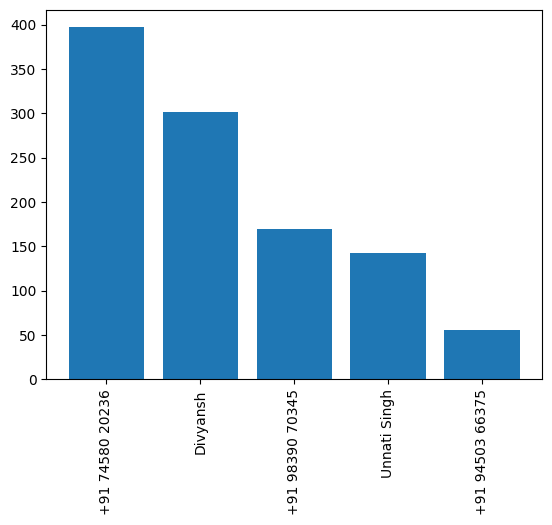

In [44]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show

In [48]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,+91 74580 20236,23.42
1,Divyansh,17.76
2,+91 98390 70345,9.97
3,Unnati Singh,8.38
4,+91 94503 66375,3.30
5,group_notification,2.54
6,+91 88871 71925,2.24
7,Abhijay Bishnoi Amity,1.65
8,Suyashi,1.65
9,Dev Btech Cse,1.47


In [57]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [58]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [60]:
words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
        

In [61]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,students,150
1,message,121
2,deleted,96
3,kindly,95
4,feedback,85
5,join,62
6,completed,62
7,singh,58
8,dear,57
9,group,54


In [64]:
import emoji

In [68]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])

In [69]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,➖,60
1,👇,17
2,✨,10
3,🧑,9
4,🚀,8
5,✅,8
6,🏼,8
7,💻,8
8,🎖,7
9,🔰,7


In [71]:
df['month_num'] = df['date'].dt.month

In [74]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [75]:
timeline


,year,month_num,month,message
0,2022,9,September,125
1,2022,10,October,60
2,2022,11,November,93
3,2022,12,December,101
4,2023,1,January,48
5,2023,2,February,118
6,2023,3,March,36
7,2023,4,April,14
8,2023,5,May,12
9,2023,6,June,38


In [77]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+ "-" +str(timeline['year'][i]))

In [78]:
timeline['time'] = time

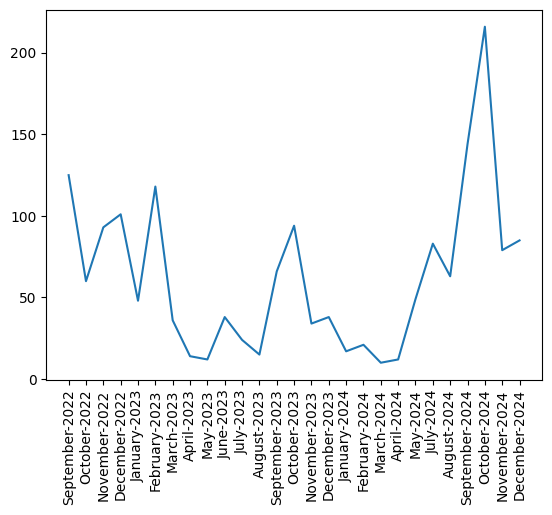

In [81]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [82]:
df['only_date'] = df['date'].dt.date

In [83]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()

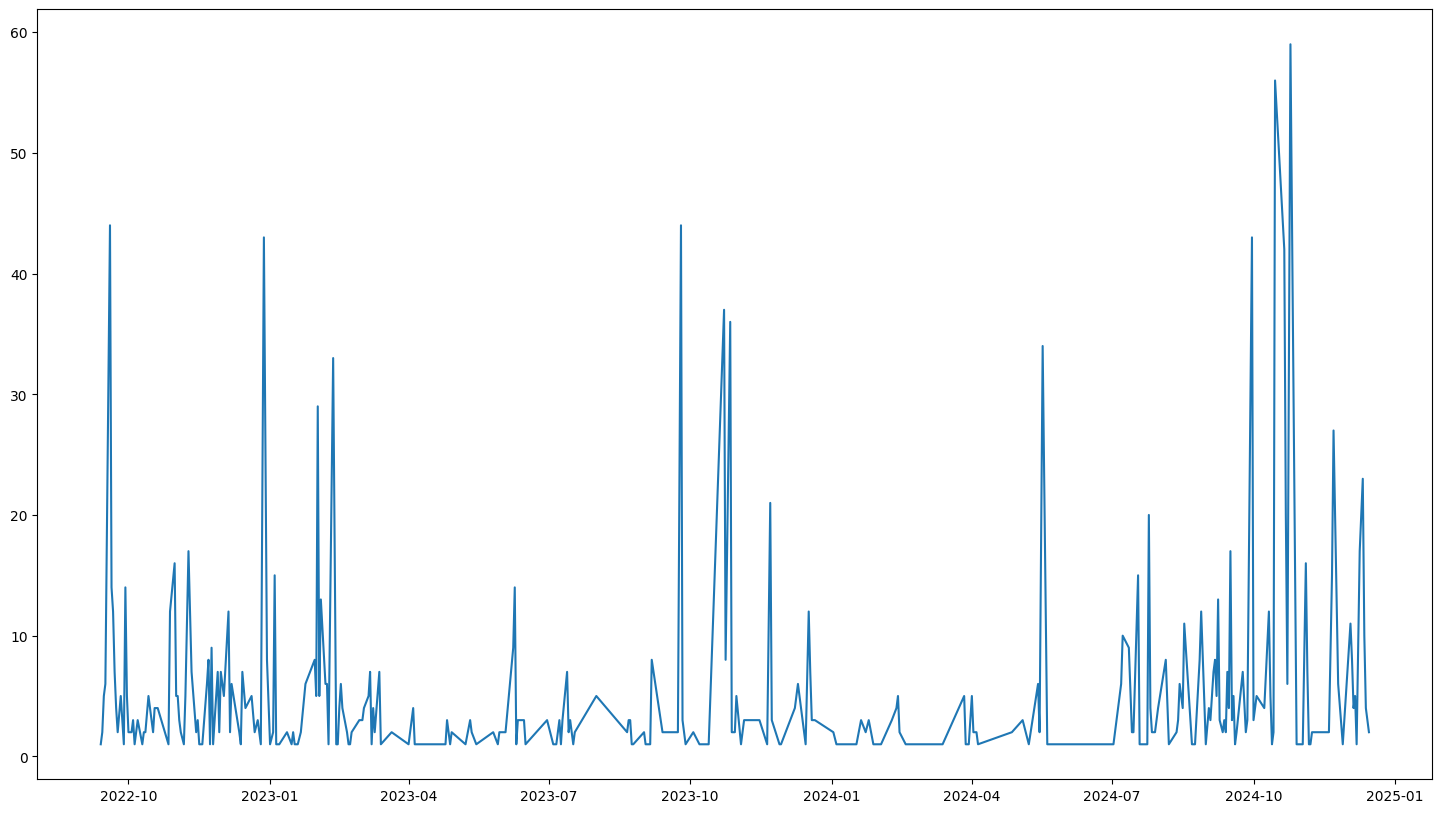

In [84]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [85]:
df['day_name'] = df['date'].dt.day_name()

In [86]:
df['day_name'].value_counts()

Monday       423
Friday       342
Tuesday      285
Wednesday    281
Thursday     197
Saturday     108
Sunday        59
Name: day_name, dtype: int64

In [87]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [88]:
df['period'] = period

In [89]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
487,2023-02-11 10:44:00,Unnati Singh,This message was deleted\n,2023,February,11,10,44,2,2023-02-11,Saturday,10-11
308,2022-12-14 12:30:00,Divyansh,<Media omitted>\n,2022,December,14,12,30,12,2022-12-14,Wednesday,12-13
889,2023-12-14 21:07:00,+91 98390 70345,"Dear All,\nThis is the information I have rece...",2023,December,14,21,7,12,2023-12-14,Thursday,21-22
820,2023-10-27 21:27:00,Abhinav Srivastav,Abhinav Srivastava\nA7605222003 \nCompleted\n,2023,October,27,21,27,10,2023-10-27,Friday,21-22
701,2023-09-23 18:05:00,+91 98390 70345,Admit card will not be generated if you do not...,2023,September,23,18,5,9,2023-09-23,Saturday,18-19


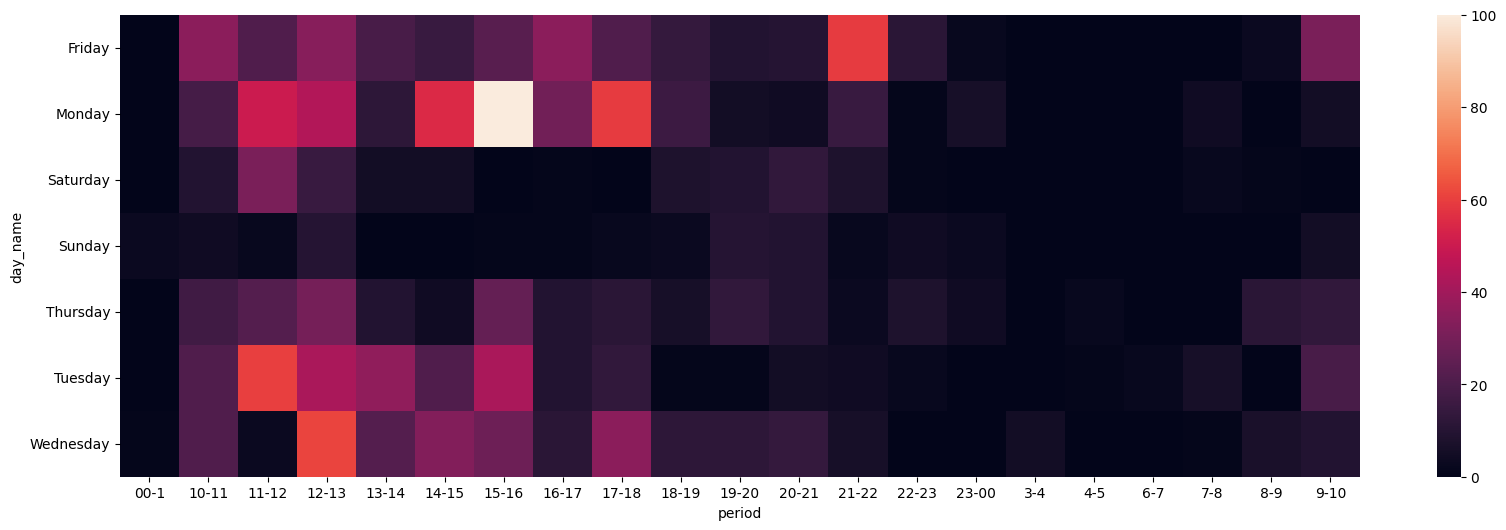

In [92]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()